In [1]:
import pygame
from pygame.locals import *
from OpenGL.GL import *
from OpenGL.GLU import *
import matplotlib.cm
import sys
sys.path.append("..")
from utils.vector_utils import *

pygame 2.0.1 (SDL 2.0.14, Python 3.8.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


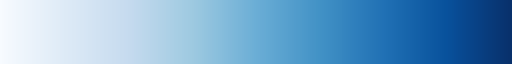

In [2]:
light = (1,2,3)
faces = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

blues = matplotlib.cm.get_cmap('Blues')
blues

In [3]:
def normal(face):
    v1, v2, v3 = face
    return (cross(subtract(v2, v1), subtract(v3, v1)))

def shade(face, color_map=blues, light=light):
    vectors_similarity = dot(unit(normal(face)), unit(light))
    return color_map(1 - vectors_similarity)

In [4]:
pygame.init()
display = (400, 400)
window = pygame.display.set_mode(display, DOUBLEBUF|OPENGL)

gluPerspective(45, 1, 0.1, 50.0)
glTranslatef(0.0,0.0, -5)
#glRotatef(30, 0, 1, 1)
glEnable(GL_CULL_FACE)
glEnable(GL_DEPTH_TEST)
glCullFace(GL_BACK)

clock = pygame.time.Clock()
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            quit()
    
    rotate_angle_per_second = 360. / 5
    rotate_angle_per_millisecond = rotate_angle_per_second / 1000
    milliseconds = clock.tick()
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    glRotatef(milliseconds * rotate_angle_per_millisecond, 1, 1, 1)
    glBegin(GL_TRIANGLES)
    for face in faces:
        color = shade(face, blues, light)
        for vertex in face:
            glColor3fv((color[0], color[1], color[2]))
            glVertex3fv(vertex)
    glEnd()
    pygame.display.flip()

error: video system not initialized